In [1]:
import os
from PIL import Image
import numpy as np
import pandas as pd

<h5>Data Import + Initial 'Preparation':

Load data:

In [2]:
ALLOWED_EXTS = {'.jpg', '.jpeg', '.png', '.bmp', '.tif', '.tiff', '.gif'}
# Import images into a datframe.

def load_images_to_df(base_dir='Misc data', nested_dir='BTC MRI Data Bhuvaji'):
    """
    Walks base_dir expecting structure:
      Misc data/
        BTC MRI Data Bhuvaji/
          Training/<label>/*.jpg
          Testing/<label>/*.jpg
    Returns a pandas DataFrame with columns: image (numpy array), label (subfolder name), split ('training'|'testing'), path.
    """
    records = []
    root = os.path.join(base_dir, nested_dir) if nested_dir else base_dir
    if not os.path.isdir(root):
        # fallback to base_dir if nested_dir not present
        if os.path.isdir(base_dir):
            root = base_dir
        else:
            return pd.DataFrame(records)

    for entry in sorted(os.listdir(root)):
        split_dir = os.path.join(root, entry)
        if not os.path.isdir(split_dir):
            continue
        entry_l = entry.lower()
        if entry_l not in ('training', 'testing'):
            continue
        split = entry_l  # normalized split name
        for label in sorted(os.listdir(split_dir)):
            label_dir = os.path.join(split_dir, label)
            if not os.path.isdir(label_dir):
                continue
            for fname in sorted(os.listdir(label_dir)):
                path = os.path.join(label_dir, fname)
                if not os.path.isfile(path):
                    continue
                ext = os.path.splitext(fname)[1].lower()
                if ext not in ALLOWED_EXTS:
                    continue
                try:
                    img = Image.open(path).convert('RGB')
                    arr = np.asarray(img)
                except Exception:
                    continue
                records.append({'image': arr, 'label': label, 'split': split, 'path': path})
    return pd.DataFrame(records)


In [7]:
raw_df = load_images_to_df('Misc data', 'BTC MRI Data Bhuvaji')
print(f"Loaded {len(df)} images")
# example: df.iloc[0]['image'] -> numpy array, df['label'] -> labels

Loaded 3264 images


In [8]:
df.head(10)

,image,label,split,path
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,testing,Misc data\BTC MRI Data Bhuvaji\Testing\glioma_...
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,testing,Misc data\BTC MRI Data Bhuvaji\Testing\glioma_...
2,"[[[7, 7, 7], [7, 7, 7], [7, 7, 7], [7, 7, 7], ...",glioma_tumor,testing,Misc data\BTC MRI Data Bhuvaji\Testing\glioma_...
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,testing,Misc data\BTC MRI Data Bhuvaji\Testing\glioma_...
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,testing,Misc data\BTC MRI Data Bhuvaji\Testing\glioma_...
5,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,testing,Misc data\BTC MRI Data Bhuvaji\Testing\glioma_...
6,"[[[32, 32, 32], [0, 0, 0], [7, 7, 7], [2, 2, 2...",glioma_tumor,testing,Misc data\BTC MRI Data Bhuvaji\Testing\glioma_...
7,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor,testing,Misc data\BTC MRI Data Bhuvaji\Testing\glioma_...
8,"[[[166, 166, 166], [254, 254, 254], [31, 31, 3...",glioma_tumor,testing,Misc data\BTC MRI Data Bhuvaji\Testing\glioma_...
9,"[[[11, 11, 11], [11, 11, 11], [11, 11, 11], [1...",glioma_tumor,testing,Misc data\BTC MRI Data Bhuvaji\Testing\glioma_...


Convert from pseudo-RGB to Grayscale:

In [24]:
data = raw_df.drop(['split','path'],axis=1)
data.head(5)

,image,label
0,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor
2,"[[[7, 7, 7], [7, 7, 7], [7, 7, 7], [7, 7, 7], ...",glioma_tumor
3,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",glioma_tumor


In [25]:
test_rimage_1 =data['image'][13]
test_rimage_1.shape
# 3 on the end implies they are stored as RGB, but likely that those 3 numbers are identical (pseudo-RGB)

(274, 248, 3)

In [15]:
# Confirm they are all grayscale:
np.allclose(test_rimage_1[..., 0], test_rimage_1[..., 1]) and np.allclose(test_rimage_1[..., 1], test_rimage_1[..., 2]) #Checks if two arrays are equal within a given tolerance

True

In [26]:
# Now reshape the arrays to (H, W, 1) by taking values from any of the 3 channels (doesn't matter as they will all be identical)
data['image'] = df['image'].apply(lambda x: x[:,:,0]) #0, 1 or 2.
data['image'][13].shape
# All good now

(274, 248)

In [27]:
data.head(5)

,image,label
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",glioma_tumor
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",glioma_tumor
2,"[[7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 5, 4, 2, 2,...",glioma_tumor
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",glioma_tumor
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",glioma_tumor


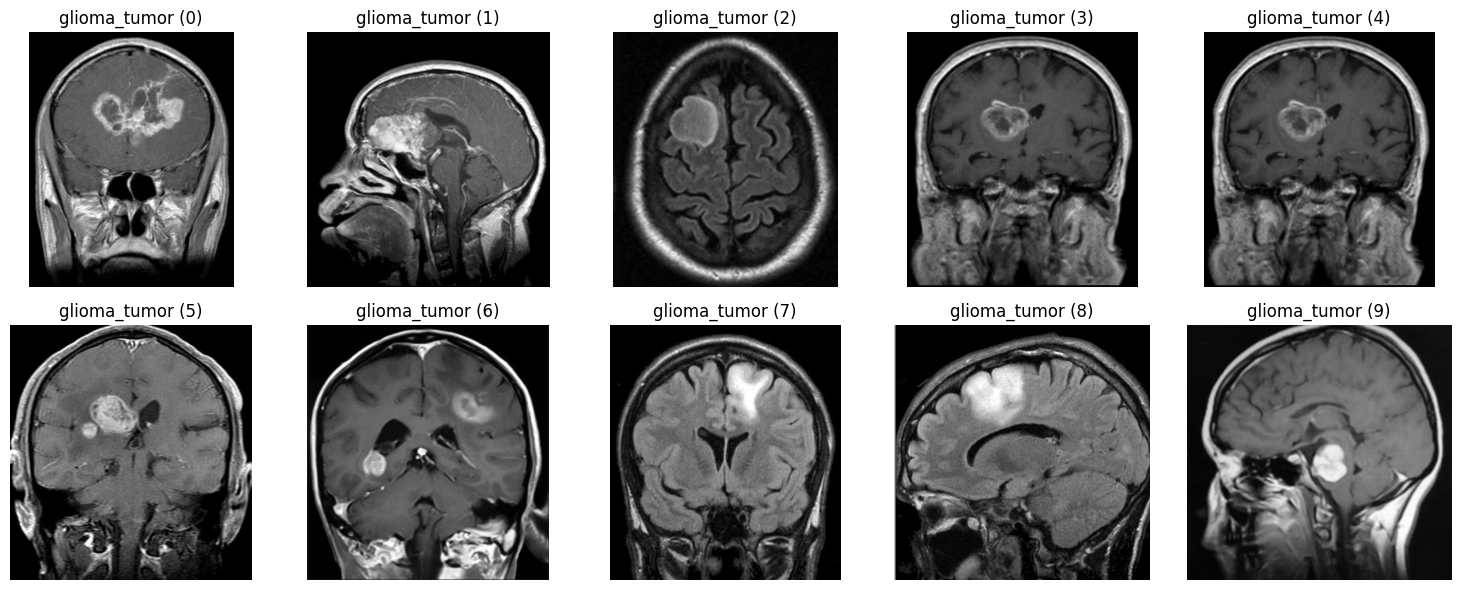

In [22]:
# Visualise one of the images:
import matplotlib.pyplot as plt

imgs = data['image'].iloc[:10].tolist()
labels = data['label'].iloc[:10].tolist()

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()
for i, (img, lbl) in enumerate(zip(imgs, labels)):
    axes[i].imshow(img, cmap='gray')
    axes[i].axis('off')
    axes[i].set_title(f"{lbl} ({i})")
plt.tight_layout()
plt.show()

# Looks great!!

<h5>EDA

In [35]:
unique_labels = sorted(data['label'].unique())
unique_labels

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']